In [1]:
import sys
print('python: {}'.format(sys.version))
import scipy
print('scipy : {}'.format(scipy.__version__))
import numpy
print('numpy : {}'.format(numpy.__version__))
import matplotlib
print('matplotlib : {}'.format(matplotlib.__version__))
import pandas 
print('pandas : {}'.format(pandas.__version__))
import sklearn
print('sklearn : {}'.format(sklearn.__version__))

python: 3.7.6 (default, Jan  8 2020, 16:21:45) [MSC v.1916 32 bit (Intel)]
scipy : 1.4.1
numpy : 1.18.1
matplotlib : 3.1.3
pandas : 1.0.1
sklearn : 0.21.1


In [5]:
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

In [9]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
names = ['sepal_length','sepal-width','petal-length','petal_width','class']
dataset = pd.read_csv(url,names=names)

In [12]:
dataset.head(20)

,sepal_length,sepal-width,petal-length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [11]:
dataset.shape

(150, 5)

In [13]:
dataset.describe()

,sepal_length,sepal-width,petal-length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


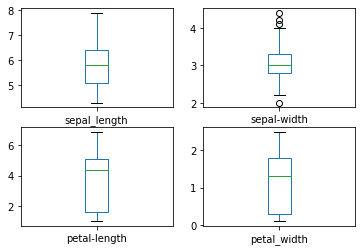

In [16]:
dataset.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)
pyplot.show()

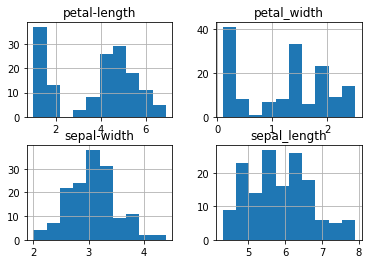

In [17]:
dataset.hist()
pyplot.show()

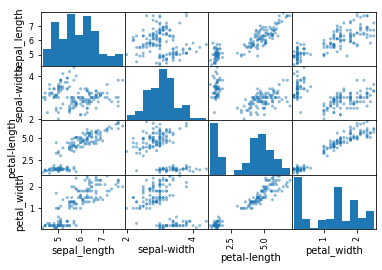

In [18]:
scatter_matrix(dataset)
pyplot.show()

In [20]:
array = dataset.values
x = array[:,0:4]
y = array[:,4]
x_train, x_validation, y_train, y_validation = train_test_split(x,y,test_size = 0.2,random_state=1)

In [25]:
models = []
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))

In [32]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10,random_state=1)
    cv_results = cross_val_score(model,x_train,y_train,cv = kfold,scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name,cv_results.mean(),cv_results.std()))

LR: 0.960897 (0.052113)
LDA: 0.973974 (0.040110)
KNN: 0.957191 (0.043263)
NB: 0.948858 (0.056322)
SVM: 0.983974 (0.032083)


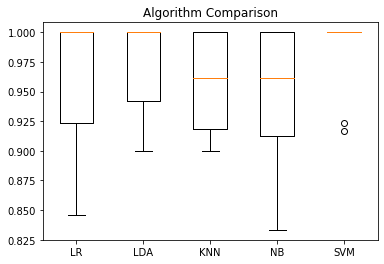

In [33]:
pyplot.boxplot(results,labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [35]:
model = SVC(gamma='auto')
model.fit(x_train, y_train)
predictions = model.predict(x_validation)

In [37]:
print(accuracy_score(y_validation,predictions))
print(confusion_matrix(y_validation,predictions))
print(classification_report(y_validation,predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

